In [2]:
import copy
import os
import re

from matplotlib import pyplot as plt
import textgrids
from scipy.io import wavfile
from silence_aligner import extract_segments_from_file
import IPython.display
from jiwer import wer

In [3]:
AUDIOS_FOLDER = "cropped_audios"
TRANSCRIPTION_FOLDER = "cropped_annotations"
TEXTS_FOLDER = "texts"

In [7]:
def sent_tokenize(text):
    return [x for x in re.split("\.|,|;|:|\n|!|¿|¡|\?|-|—|\(|\)|«|»", text) if x.replace(" ", "")]


def align_single(base_file_name):
    frequency_from_signal, signal = wavfile.read(
        os.path.join(
            AUDIOS_FOLDER,
            f"{base_file_name}.wav"
        )
    )
    silences, frequency  = extract_segments_from_file(
        os.path.join(
            AUDIOS_FOLDER,
            f"{base_file_name}.wav"
        )
    )

    segments = list()
    last_start = 0
    for start, stop in silences:
        segments.append((last_start, start))
        last_start = stop

    segments.append((last_start,signal.shape[-1]))
    with open(
        os.path.join(
            TEXTS_FOLDER,
            f"{base_file_name}.txt"
        )
    ) as file:
        text = " ".join(file.readlines())

    tokens = sent_tokenize(text)
    transcription = textgrids.TextGrid(
        os.path.join(
            TRANSCRIPTION_FOLDER,
            f"{base_file_name}.TextGrid"
        )
    )

    intervals = transcription[base_file_name.replace("cropped_", "")]
    alignment = list()
    for index, current_segment in enumerate(segments):
        try:
            alignment.append(
                {
                    "text": tokens[index],
                    "xmin" : current_segment[0]/frequency,
                    "xmax" : current_segment[1]/frequency
                }
            )
        except IndexError:
            print("Breaking on index", index)
            break
    wer_list = list()

    current_annotation_index = 0
    current_interval_index = 0
    while current_interval_index < len(intervals):
        try:
            interval = intervals[current_interval_index]
            t_text = interval.text
            t_min = interval.xmin
            t_max = interval.xmax

            a_text = alignment[current_annotation_index]["text"]
            a_min = alignment[current_annotation_index]["xmin"]
            a_xmax = alignment[current_annotation_index]["xmax"]

            if a_xmax < t_max + 1:
                print("Match: ", a_xmax, t_max + 1,)
                wer_list.append((tokens[int(t_text)-1], a_text))
            else:
                print("Not Match", a_xmax, t_max + 1,)
                interval_to_append = [t_text]

                while not a_xmax < t_max + 1:
                    print("trying next", a_xmax, t_max + 0.5)
                    current_interval_index += 1
                    interval = intervals[current_interval_index]
                    t_text = interval.text
                    t_min = interval.xmin
                    t_max = interval.xmax
                    interval_to_append.append(t_text)
                value_to_append = list()
                for i in interval_to_append:
                    try:
                        value_to_append.append(tokens[int(i)-1])
                    except ValueError:
                        print("Error decoding", i)
                wer_list.append(("".join(value_to_append), a_text))


            current_interval_index += 1
            current_annotation_index += 1
        except IndexError:
            print("Exiting on index current_interval_index", current_interval_index, "current_annotation_index", current_annotation_index)
            break

    wer_values = list()
    for x in wer_list:
        true_value = x[0].split()
        inferred_value = x[1].split()
        local_wer = wer(true_value, inferred_value)
        percentaje = len(true_value)/ words_count
        print(true_value)
        print(inferred_value)
        print(local_wer)
        print(percentaje)
        wer_values.append(local_wer * percentaje)
    return total_wer * 100

In [8]:
for file_name in os.listdir(TRANSCRIPTION_FOLDER):
    print(file_name)
    try:
        align_single(
            file_name.replace(".TextGrid", "")
        )

    except FileNotFoundError:
        print("File not found on", file_name)
    break


cropped_F_13_1.TextGrid
Desired threshold, 0.05
2807376715.761885
File not found on cropped_F_13_1.TextGrid
cropped_M_45_1.TextGrid
Desired threshold, 0.05
1693037607.5033379
File not found on cropped_M_45_1.TextGrid
cropped_M_74_1.TextGrid
Desired threshold, 0.05
2125183467.5488214
File not found on cropped_M_74_1.TextGrid
cropped_F_73_1.TextGrid
Desired threshold, 0.05
3262914028.40407
File not found on cropped_F_73_1.TextGrid
cropped_M_27_1.TextGrid
Desired threshold, 0.05
11036553227.861982
File not found on cropped_M_27_1.TextGrid
cropped_F_60_1.TextGrid
Desired threshold, 0.05
4381507435.437266
File not found on cropped_F_60_1.TextGrid
cropped_F_10_1.TextGrid
Desired threshold, 0.05
269450236.9541746
File not found on cropped_F_10_1.TextGrid
cropped_M_15_1.TextGrid
Desired threshold, 0.05
4278862679.0722523
File not found on cropped_M_15_1.TextGrid
cropped_M_71_1.TextGrid
Desired threshold, 0.05
0.01088053934242552
File not found on cropped_M_71_1.TextGrid
cropped_M_70_1.TextGrid

In [3]:

base_file_name = "cropped_F_08_1"

'/home/ma0/projects/openspeechorg/python-speech-soa/06_alignment'

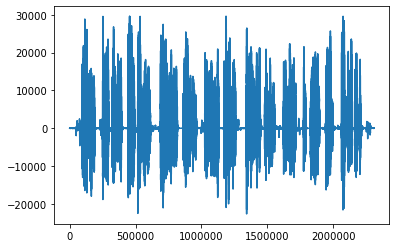

In [4]:

frequency_from_signal, signal = wavfile.read(f"{base_file_name}.wav")
plt.plot(signal)

In [5]:
silences, frequency  = extract_segments_from_file(f"{base_file_name}.wav")

Desired threshold, 0.05
3619967448.9380054


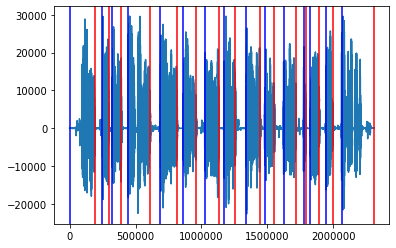

In [6]:

segments = list()
last_start = 0
for start, stop in silences:
    segments.append((last_start, start))
    last_start = stop

segments.append((last_start,signal.shape[-1]))
plt.plot(signal)
for start, stop in segments:
    plt.axvline(start, color="blue")
    plt.axvline(stop, color="red")

In [7]:


with open(f"{base_file_name}.txt") as file:
    text = " ".join(file.readlines())

tokens = sent_tokenize(text)
words_count = len(text.split(" "))

In [8]:

tokens

['En segura pobreza vive Eumelo',
 ' Con dulce libertad',
 ' y le mantienen',
 ' Las simples aves',
 ' que engañadas vienen',
 ' A los lazos y liga sin recelo',
 ' Por mejor suerte no importuna al cielo',
 ' Ni se muestra envidioso a la que tienen',
 ' Los que con ansia de subir sostienen',
 ' En flacas alas el incierto vuelo',
 ' Muerte tras luengos años no le espanta',
 ' Ni la recibe con indigna queja',
 ' Mas con sosiego grato y faz amiga',
 ' Al fin',
 ' muriendo con pobreza tanta',
 ' Ricos juzga sus hijos',
 ' pues les deja',
 ' La libertad',
 ' las aves y la liga']

In [9]:
transcription = textgrids.TextGrid(f"{base_file_name}.TextGrid")

intervals = transcription[base_file_name.replace("cropped_", "")]

In [10]:
alignment = list()
for index, current_segment in enumerate(segments):
    try:
        alignment.append(
            {
                "text": tokens[index],
                "xmin" : current_segment[0]/frequency,
                "xmax" : current_segment[1]/frequency
            }
        )
    except IndexError:
        print("Breaking on index", index)
        break

alignment

[{'text': 'En segura pobreza vive Eumelo', 'xmin': 0.0, 'xmax': 4.3},
 {'text': ' Con dulce libertad', 'xmin': 5.65, 'xmax': 6.69},
 {'text': ' y le mantienen', 'xmin': 7.3, 'xmax': 8.91},
 {'text': ' Las simples aves', 'xmin': 10.04, 'xmax': 13.81},
 {'text': ' que engañadas vienen', 'xmin': 15.63, 'xmax': 18.48},
 {'text': ' A los lazos y liga sin recelo', 'xmin': 19.49, 'xmax': 21.75},
 {'text': ' Por mejor suerte no importuna al cielo',
  'xmin': 23.26,
  'xmax': 25.67},
 {'text': ' Ni se muestra envidioso a la que tienen',
  'xmin': 26.59,
  'xmax': 28.54},
 {'text': ' Los que con ansia de subir sostienen',
  'xmin': 30.35,
  'xmax': 32.78},
 {'text': ' En flacas alas el incierto vuelo', 'xmin': 33.56, 'xmax': 35.14},
 {'text': ' Muerte tras luengos años no le espanta',
  'xmin': 36.83,
  'xmax': 38.94},
 {'text': ' Ni la recibe con indigna queja', 'xmin': 40.27, 'xmax': 40.7},
 {'text': ' Mas con sosiego grato y faz amiga', 'xmin': 41.45, 'xmax': 43.0},
 {'text': ' Al fin', 'xmin

In [11]:
intervals

[<Interval text="1" xmin=0.0 xmax=5.317000166059568>,
 <Interval text="2" xmin=5.317000166059568 xmax=6.937603181134946>,
 <Interval text="3" xmin=6.937603181134946 xmax=8.119690086248752>,
 <Interval text="4" xmin=8.119690086248752 xmax=9.835622690446208>,
 <Interval text="5" xmin=9.835622690446208 xmax=11.475291623346003>,
 <Interval text="6" xmin=11.475291623346003 xmax=15.548123785583698>,
 <Interval text="7" xmin=15.548123785583698 xmax=19.202865166166973>,
 <Interval text="8" xmin=19.202865166166973 xmax=23.39701482603091>,
 <Interval text="9" xmin=23.39701482603091 xmax=26.277014826030914>,
 <Interval text="10" xmin=26.277014826030914 xmax=29.990733646892593>,
 <Interval text="11" xmin=29.990733646892593 xmax=33.36846607319645>,
 <Interval text="12" xmin=33.36846607319645 xmax=36.27554090312842>,
 <Interval text="13" xmin=36.27554090312842 xmax=39.790416186575136>,
 <Interval text="14" xmin=39.790416186575136 xmax=41.511776730792825>,
 <Interval text="15" xmin=41.511776730792825

In [12]:
wer_list = list()

current_annotation_index = 0
current_interval_index = 0
while current_interval_index < len(intervals):
    try:
        interval = intervals[current_interval_index]
        t_text = interval.text
        t_min = interval.xmin
        t_max = interval.xmax

        a_text = alignment[current_annotation_index]["text"]
        a_min = alignment[current_annotation_index]["xmin"]
        a_xmax = alignment[current_annotation_index]["xmax"]

        if a_xmax < t_max + 1:
            print("Match: ", a_xmax, t_max + 1,)
            wer_list.append((tokens[int(t_text)-1], a_text))
        else:
            print("Not Match", a_xmax, t_max + 1,)
            interval_to_append = [t_text]

            while not a_xmax < t_max + 1:
                print("trying next", a_xmax, t_max + 0.5)
                current_interval_index += 1
                interval = intervals[current_interval_index]
                t_text = interval.text
                t_min = interval.xmin
                t_max = interval.xmax
                interval_to_append.append(t_text)
            value_to_append = list()
            for i in interval_to_append:
                try:
                    value_to_append.append(tokens[int(i)-1])
                except ValueError:
                    print("Error decoding", i)
            wer_list.append(("".join(value_to_append), a_text))


        current_interval_index += 1
        current_annotation_index += 1
    except IndexError:
        print("Exiting on index current_interval_index", current_interval_index, "current_annotation_index", current_annotation_index)
        break

Match:  4.3 6.317000166059568
Match:  6.69 7.937603181134946
Match:  8.91 9.119690086248752
Not Match 13.81 10.835622690446208
trying next 13.81 10.335622690446208
trying next 13.81 11.975291623346003
Match:  18.48 20.202865166166973
Match:  21.75 24.39701482603091
Match:  25.67 27.277014826030914
Match:  28.54 30.990733646892593
Match:  32.78 34.36846607319645
Match:  35.14 37.27554090312842
Match:  38.94 40.790416186575136
Match:  40.7 42.511776730792825
Match:  43.0 44.72703750176789
Match:  45.26 47.2340896559629
Not Match 52.403401360544215 48.73735306952624
trying next 52.403401360544215 48.23735306952624
trying next 52.403401360544215 49.483568114012776
trying next 52.403401360544215 51.28402162875201
Error decoding 
Exiting on index current_interval_index 20 current_annotation_index 15


In [13]:
wer_list


[('En segura pobreza vive Eumelo', 'En segura pobreza vive Eumelo'),
 (' Con dulce libertad', ' Con dulce libertad'),
 (' y le mantienen', ' y le mantienen'),
 (' Las simples aves que engañadas vienen A los lazos y liga sin recelo',
  ' Las simples aves'),
 (' Por mejor suerte no importuna al cielo', ' que engañadas vienen'),
 (' Ni se muestra envidioso a la que tienen',
  ' A los lazos y liga sin recelo'),
 (' Los que con ansia de subir sostienen',
  ' Por mejor suerte no importuna al cielo'),
 (' En flacas alas el incierto vuelo',
  ' Ni se muestra envidioso a la que tienen'),
 (' Muerte tras luengos años no le espanta',
  ' Los que con ansia de subir sostienen'),
 (' Ni la recibe con indigna queja', ' En flacas alas el incierto vuelo'),
 (' Mas con sosiego grato y faz amiga',
  ' Muerte tras luengos años no le espanta'),
 (' Al fin', ' Ni la recibe con indigna queja'),
 (' muriendo con pobreza tanta', ' Mas con sosiego grato y faz amiga'),
 (' Ricos juzga sus hijos', ' Al fin'),
 ('

In [14]:
wer_values = list()
for x in wer_list:
    true_value = x[0].split()
    inferred_value = x[1].split()
    local_wer = wer(true_value, inferred_value)
    percentaje = len(true_value)/ words_count
    print(true_value)
    print(inferred_value)
    print(local_wer)
    print(percentaje)
    wer_values.append(local_wer * percentaje)

wer_values

['En', 'segura', 'pobreza', 'vive', 'Eumelo']
['En', 'segura', 'pobreza', 'vive', 'Eumelo']
0.0
0.052083333333333336
['Con', 'dulce', 'libertad']
['Con', 'dulce', 'libertad']
0.0
0.03125
['y', 'le', 'mantienen']
['y', 'le', 'mantienen']
0.0
0.03125
['Las', 'simples', 'aves', 'que', 'engañadas', 'vienen', 'A', 'los', 'lazos', 'y', 'liga', 'sin', 'recelo']
['Las', 'simples', 'aves']
0.7692307692307693
0.13541666666666666
['Por', 'mejor', 'suerte', 'no', 'importuna', 'al', 'cielo']
['que', 'engañadas', 'vienen']
1.0
0.07291666666666667
['Ni', 'se', 'muestra', 'envidioso', 'a', 'la', 'que', 'tienen']
['A', 'los', 'lazos', 'y', 'liga', 'sin', 'recelo']
1.0
0.08333333333333333
['Los', 'que', 'con', 'ansia', 'de', 'subir', 'sostienen']
['Por', 'mejor', 'suerte', 'no', 'importuna', 'al', 'cielo']
1.0
0.07291666666666667
['En', 'flacas', 'alas', 'el', 'incierto', 'vuelo']
['Ni', 'se', 'muestra', 'envidioso', 'a', 'la', 'que', 'tienen']
1.3333333333333333
0.0625
['Muerte', 'tras', 'luengos', 'añ

[0.0,
 0.0,
 0.0,
 0.10416666666666667,
 0.07291666666666667,
 0.08333333333333333,
 0.07291666666666667,
 0.08333333333333333,
 0.07291666666666667,
 0.0625,
 0.07291666666666667,
 0.0625,
 0.0625,
 0.041666666666666664,
 0.10416666666666667]

In [15]:
sum(wer_values)

0.8958333333333333

In [16]:
total_wer = sum(wer_values)
total_wer * 100

89.58333333333333

In [3]:
wer(["a", "b", "c", "d"], ["1", "2", "3", "4"])

1.0

In [4]:
wer(["a", "b", "c", "d"], ["a", "b", "c", "d"])

0.0

In [5]:
wer(["a", "b", "c", "d"], ["a", "b"])

0.5

In [6]:
wer(["a", "b", "c", "d"], ["s", "a", "b"])


0.75

In [8]:
wer(["a", "b"], ["s", "a", "b"])

0.5

In [7]:

wer(['En', 'segura', 'pobreza', 'vive', 'Eumelo'],
    ['En', 'segura', 'pobreza', 'vive', 'Eumelo'])

0.0

In [9]:

wer(['muriendo', 'con', 'pobreza', 'tanta'],
['Mas', 'con', 'sosiego', 'grato', 'y', 'faz', 'amiga'])

1.5